In [1]:
#By Arpan Mitra 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
#loading dataset
data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\PRJ Cancer Prediction-20240710T145202Z-001\\PRJ Cancer Prediction\\data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#Identifying data types
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
#displaying benign and malignant tumour counts
display(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
#checking for null values
display(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#creating a variable and applying label encoder on 'diagnosis column'
df=data
df.diagnosis=pd.Categorical(data.diagnosis)
df['diagnosis']=df['diagnosis'].cat.codes
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#Create X variable with out ID and diagnosis column 
x= df.drop ('diagnosis',axis =1).drop('id',axis =1)
display(x)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#Creating Y variable
y=df['diagnosis']
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

In [9]:
correlation = df.corr()
display(correlation)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


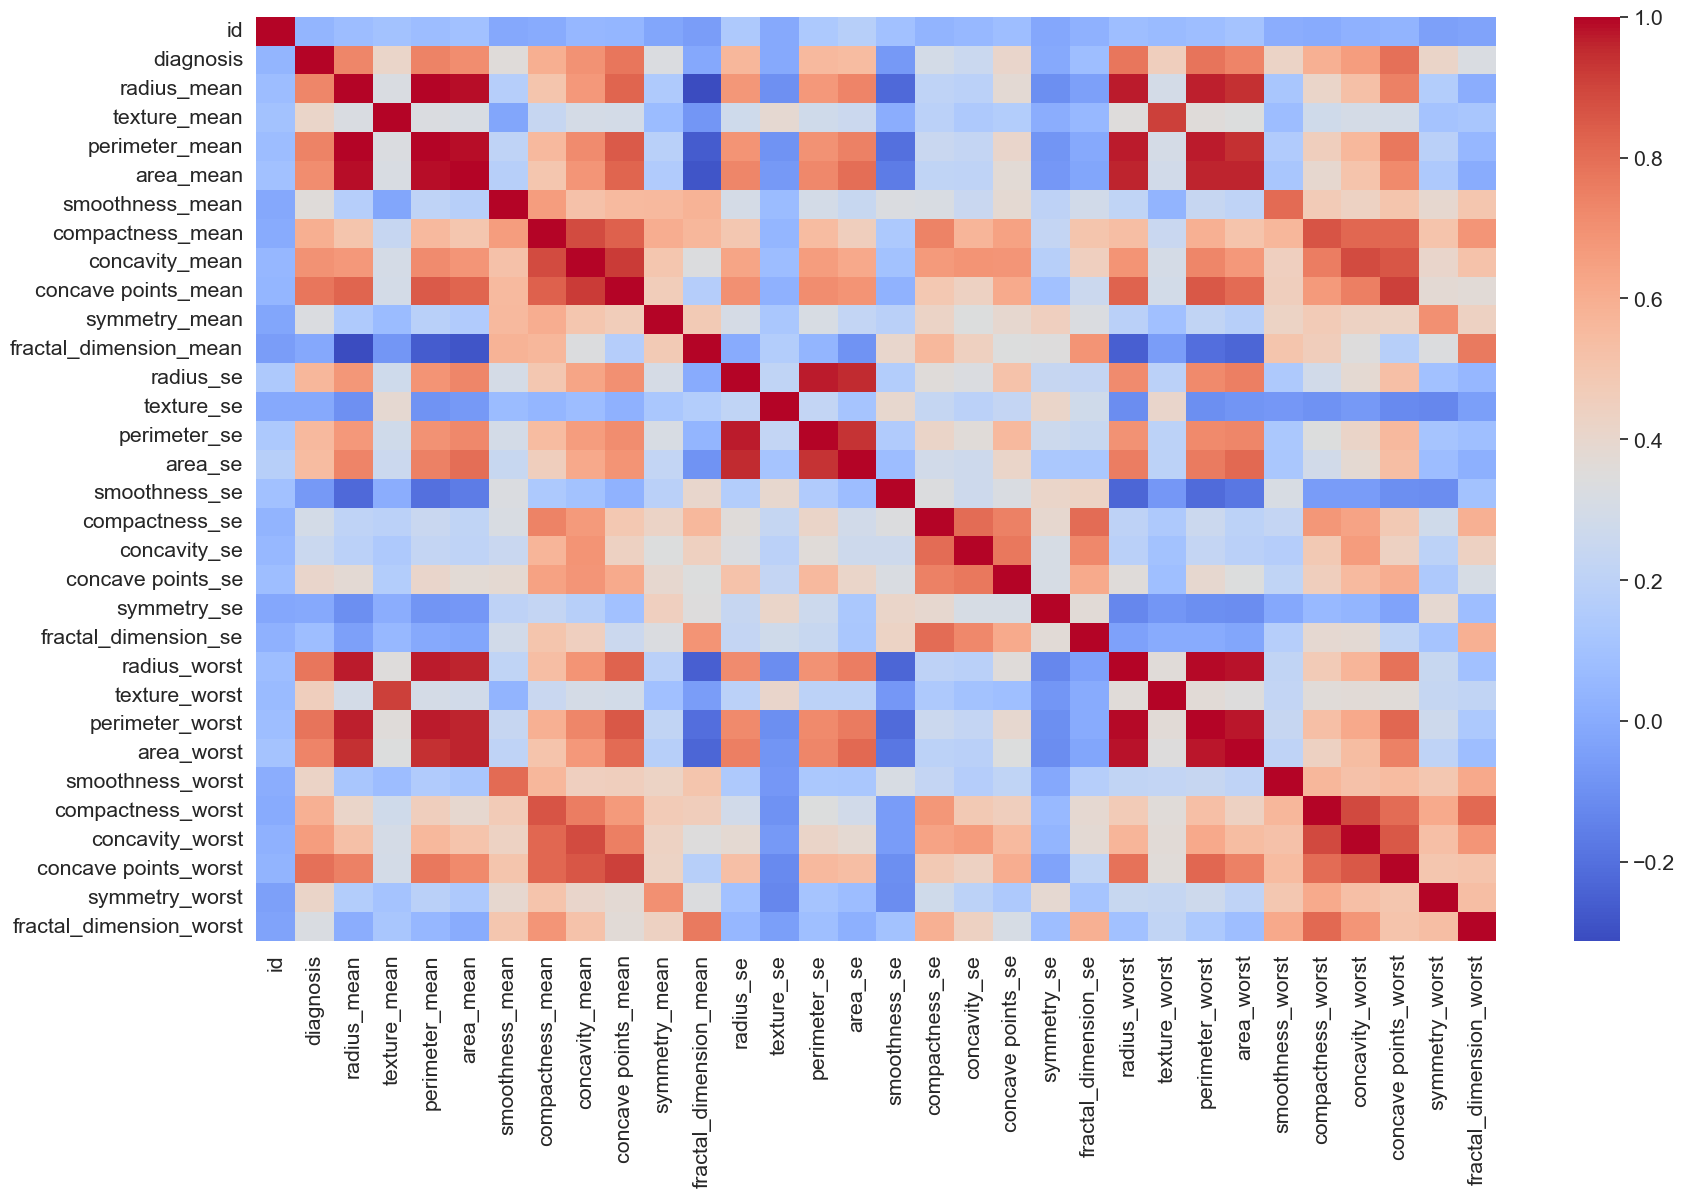

In [10]:
plt.rcParams['figure.figsize']=(20,12)
sns.set(font_scale=1.4)
sns.heatmap(correlation,cmap='coolwarm',annot=None)
plt.show()

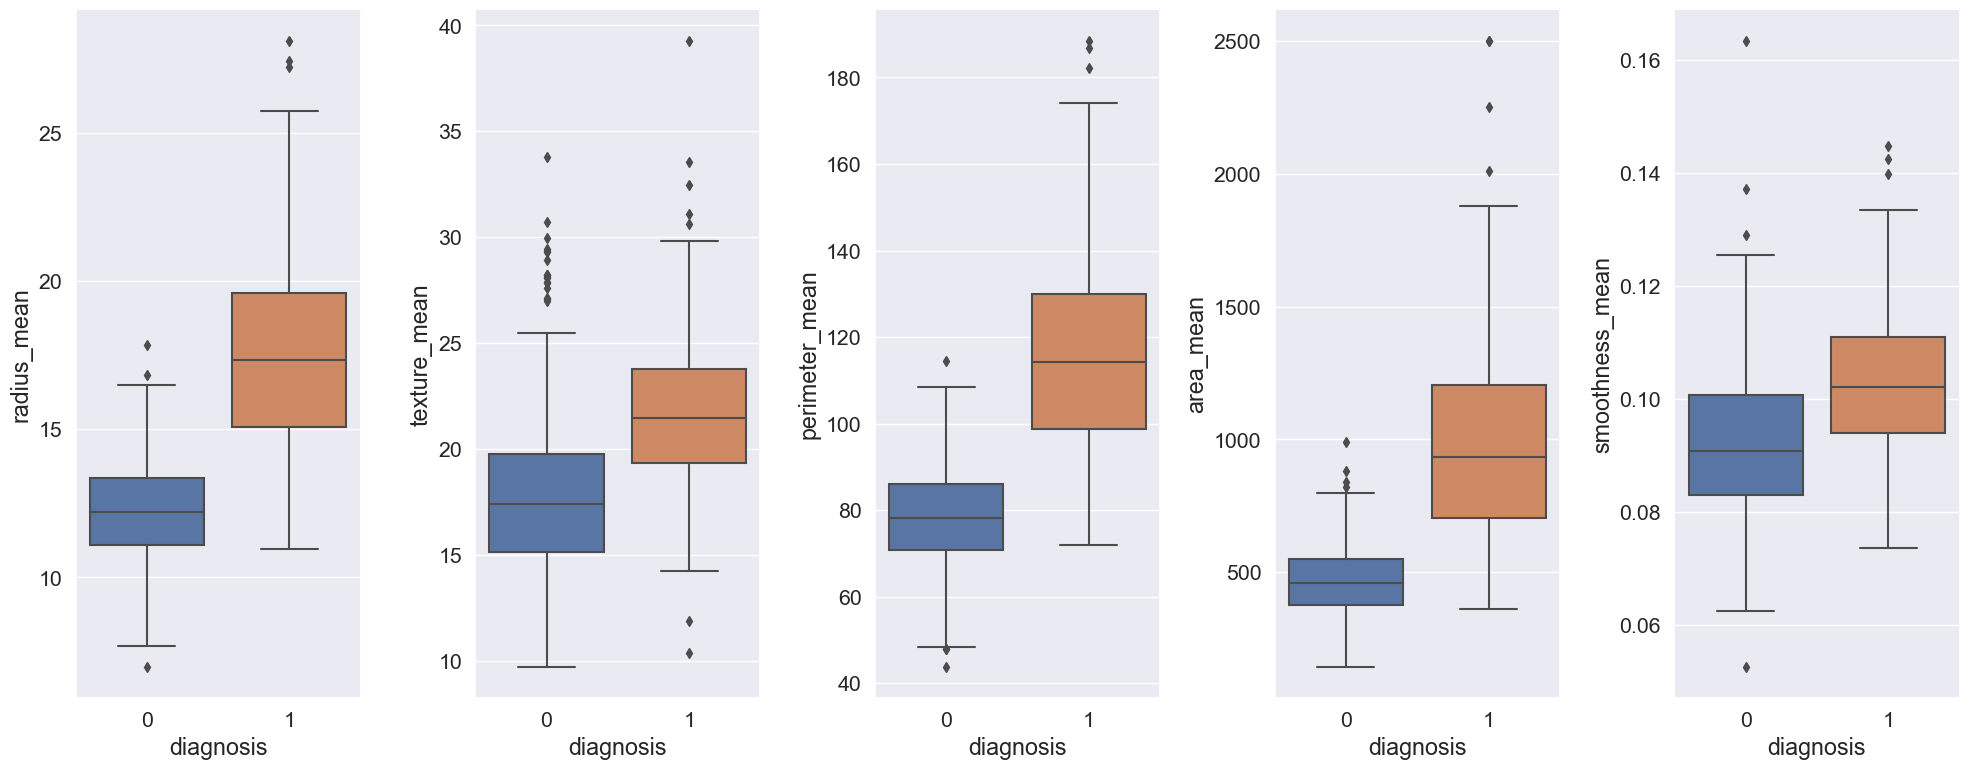

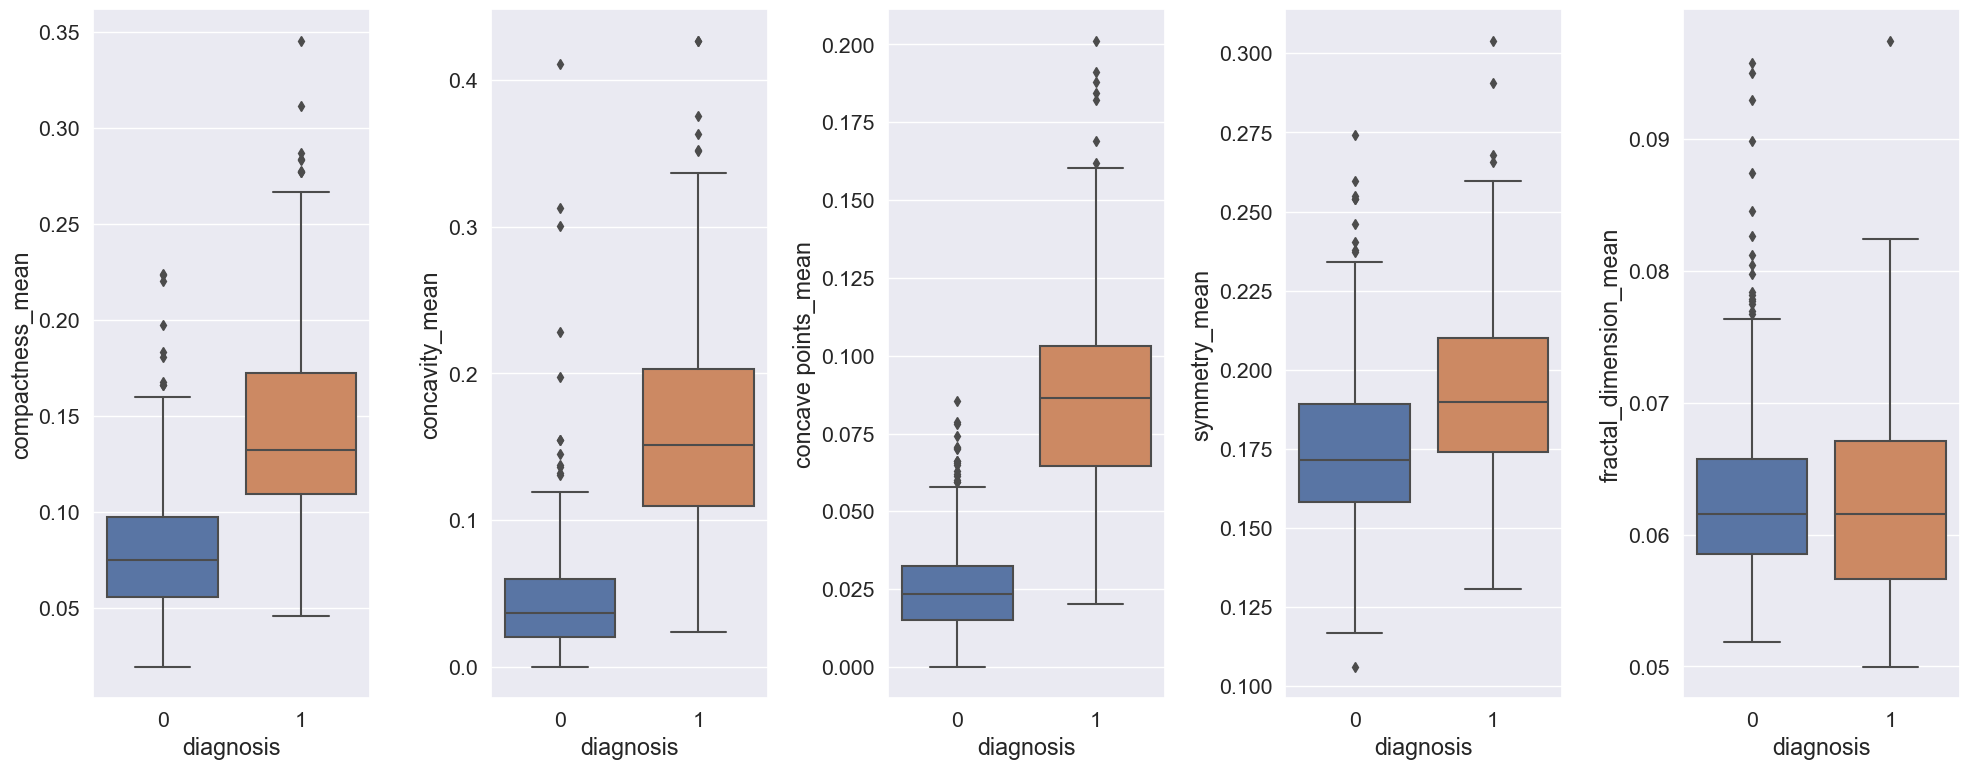

In [11]:
#box plot to check the outliers. Not going to remove outliers since this data is important. 
# Observation, when 'diagnosis' is "B", the values are lower 
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot ( x= df['diagnosis'], y = df['radius_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_mean'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_mean'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_mean'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_mean']  , ax = ax5)
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_mean'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_mean'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_mean'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_mean'] , ax = ax5)
f .tight_layout()

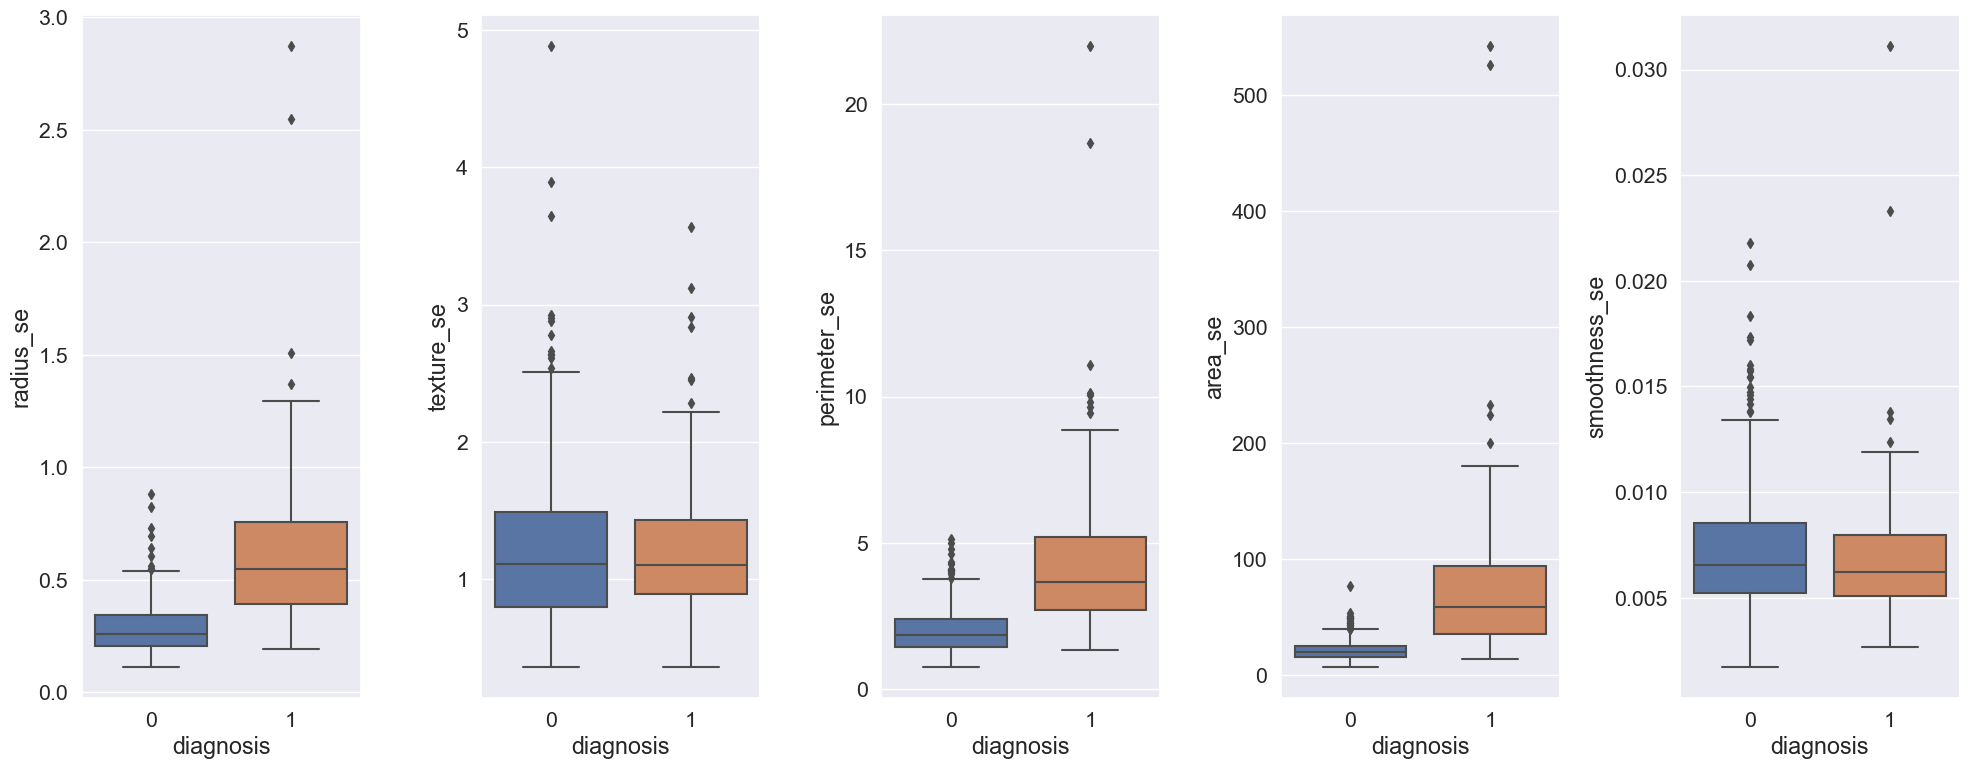

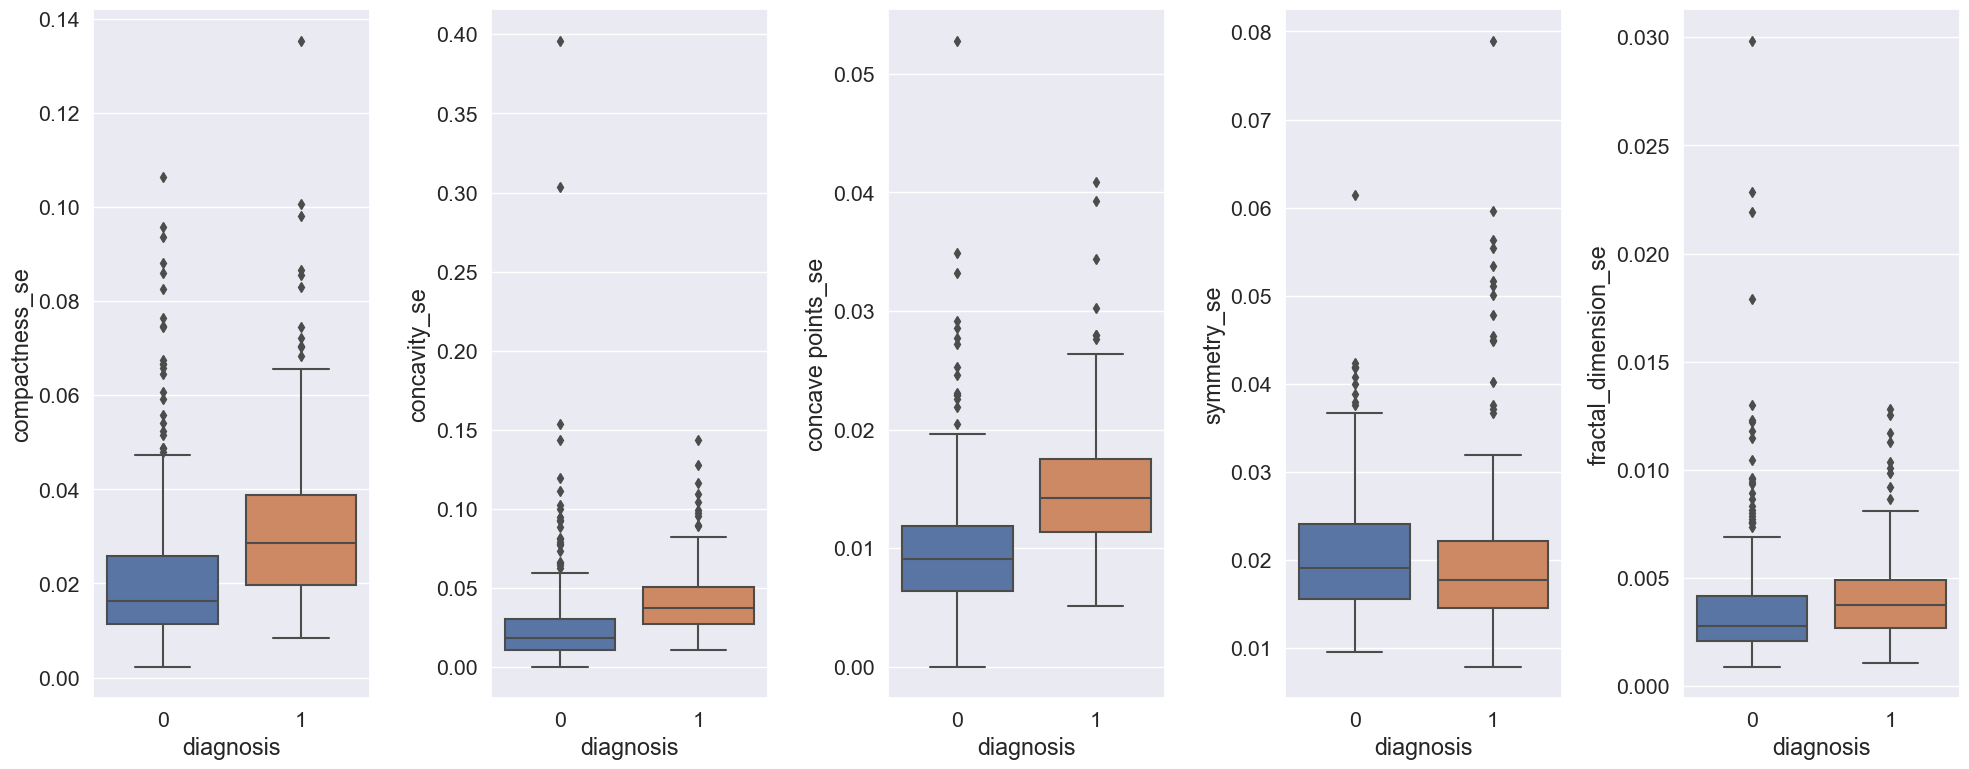

In [12]:
#box plot to check the outliers. Not going to remove outliers since this data is important. 
# Observation, when 'diagnosis' is "B", the values are lower 
plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot ( x= df['diagnosis'], y = df['radius_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_se'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_se'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_se'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_se']  , ax = ax5)
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_se'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_se'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_se'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_se'] , ax = ax5)
f .tight_layout()

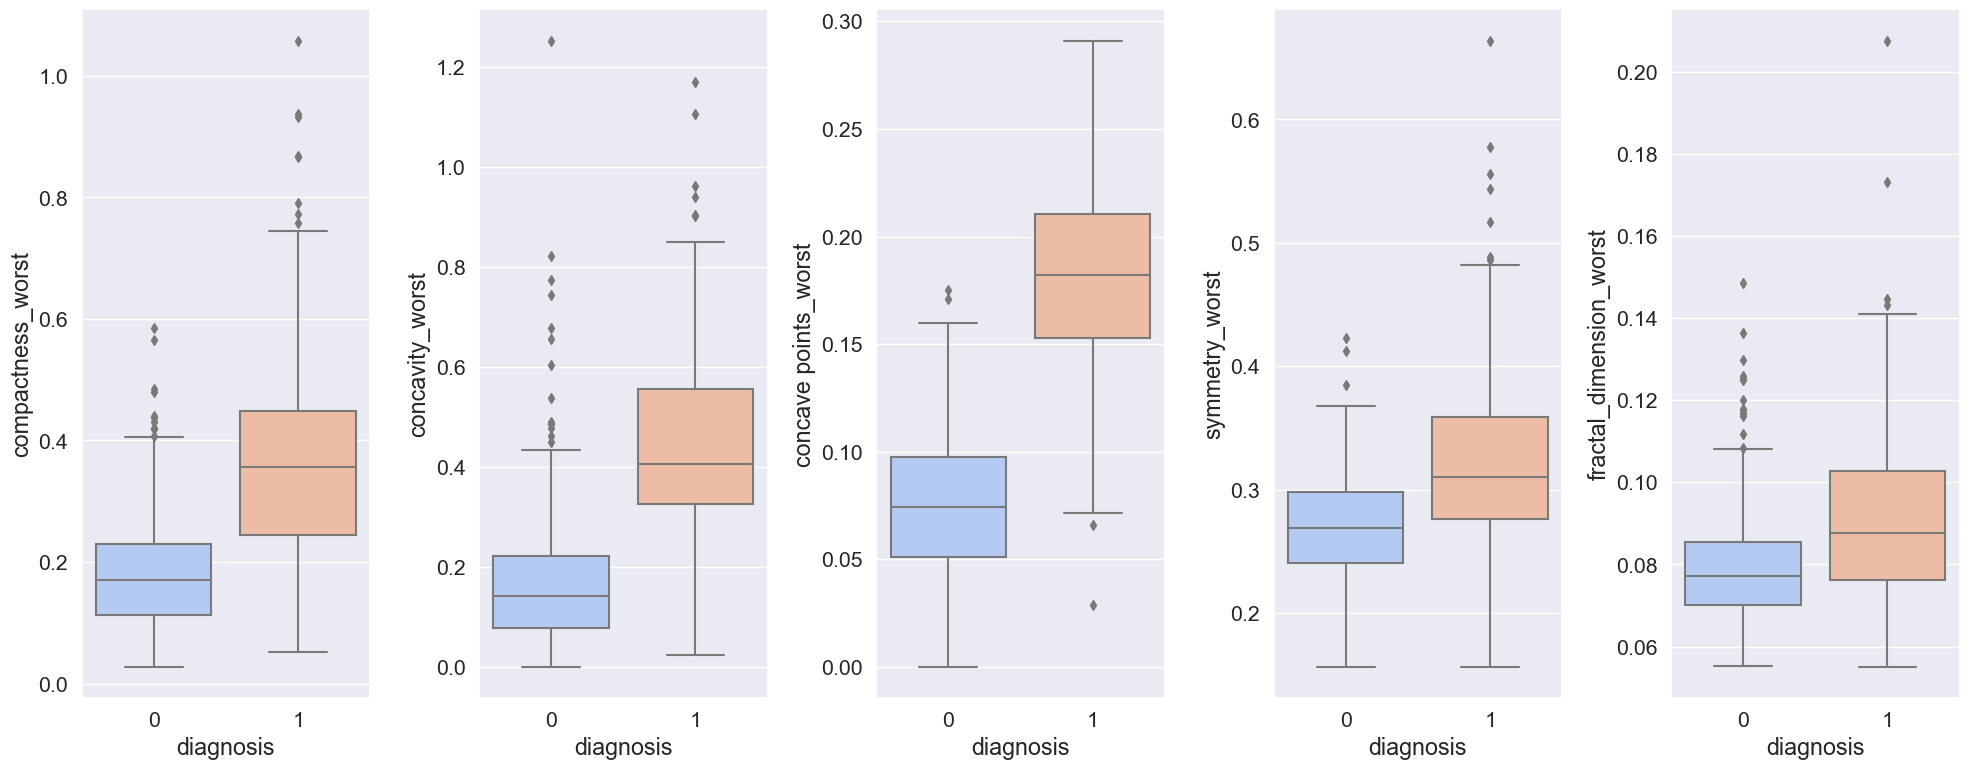

In [13]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_worst'], ax = ax1,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['concavity_worst'] , ax = ax2,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['concave points_worst'], ax = ax3,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['symmetry_worst'], ax = ax4,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_worst'], ax = ax5,palette = 'coolwarm')
f.tight_layout()

In [14]:
#Function to train model and print accuracy and classification report
best_model = dict()
def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
   
    # Implementing GridSearchCV to find best parameters
    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams, cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    #Displaying best parameters, classification report, accuracy score and confusion matrix
    print('Best Params :', best_params)
    print('Classification Report:',classification_report(y_test,pred))
    print('Accuracy Score', (accuracy_score(y_test,pred)))
    print('Confusion Matrix :\n',cm)
    
    #Storing accuracy score and model name in best_model
    best_model[algo_name] = accuracy_score(y_test,pred)

In [15]:
#Implementing SVC
param = {'C': [0.1,1,100,1000],'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]}
FitModel (x,y,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score 0.9298245614035088
Confusion Matrix :
 [[71  4]
 [ 4 35]]


In [16]:
#Implementing Random Forest
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'Random Forest',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score 0.9824561403508771
Confusion Matrix :
 [[73  2]
 [ 0 39]]


In [17]:
#Implementing Decision Tree
param = {'criterion':['gini','entropy'],'max_depth':[0,1,2,3,4,5]}
FitModel(x,y,'Decision Tree',DecisionTreeClassifier(),param,cv=10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'criterion': 'gini', 'max_depth': 3}
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy Score 0.9385964912280702
Confusion Matrix :
 [[72  3]
 [ 4 35]]


In [18]:
#Implementing XGBoost
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score 0.9736842105263158
Confusion Matrix :
 [[73  2]
 [ 1 38]]


In [19]:
#Implementing Logistic Regression
param = {'C': [0.1,1,100,1000],'max_iter':[10,50,100,500],'verbose':[0,1,2,3]}
FitModel(x,y,'Logistic Regression',LogisticRegression(),param,cv=10)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'C': 100, 'max_iter': 500, 'verbose': 0}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.88      0.97      0.93        39

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score 0.9473684210526315
Confusion Matrix :
 [[70  5]
 [ 1 38]]


In [20]:
#Implementing KNeighbors
param = {'n_neighbors': [1, 2, 4, 5, 10, 15, 20, 50], 'metric': ['minkowski'], 'p': [1, 2]}

FitModel(x,y,'KNeighbors',KNeighborsClassifier(),param,cv=10)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1}
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score 0.9298245614035088
Confusion Matrix :
 [[72  3]
 [ 5 34]]


In [21]:
#Implementing BernoulliNB
param=dict()
FitModel(x,y,'BernoulliNB',BernoulliNB(),param,cv=10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Best Params : {}
Classification Report:               precision    recall  f1-score   support

           0       0.66      1.00      0.79        75
           1       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114

Accuracy Score 0.6578947368421053
Confusion Matrix :
 [[75  0]
 [39  0]]


In [22]:
#Implementing AdaBoost
param = {'n_estimators':[100,200,300],'learning_rate':[.1,.01,.001]}
clf = AdaBoostClassifier()
FitModel(x, y, 'AdaBoost', clf, param, cv=10)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]
Best Params : {'learning_rate': 0.1, 'n_estimators': 300}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy Score 0.9649122807017544
Confusion Matrix :
 [[72  3]
 [ 1 38]]


In [23]:
#Displaying best three models

best_three_models = sorted(best_model.items(), key=lambda item: item[1],reverse = True)[:3]
print('Best three models')
for key, value in best_three_models:
    print(key, value, end='\n')


Best three models
Random Forest 0.9824561403508771
XGBoost 0.9736842105263158
AdaBoost 0.9649122807017544


From the above method we got three models with accuracy higher than 95%. These are
Model name     Accuracy Score
Random Forest  0.9824561403508771
XGBoost        0.9736842105263158
AdaBoost       0.9649122807017544

# Method 2: Implementing oversampling to get better accuracy

In [24]:
from imblearn.over_sampling import SMOTE
display (df['diagnosis'].value_counts()) 
sm = SMOTE(random_state =42)
X_res, Y_res = sm.fit_resample (x, y)
print("After over sampling")
display(Y_res.value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64

After over sampling


diagnosis
1    357
0    357
Name: count, dtype: int64

In [25]:
best_model = dict()

In [26]:
all_models = {
    'SVC': {'param': {'C': [0.1, 1, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 100]}},
    'RandomForestClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'DecisionTreeClassifier': {'param': {'criterion': ['gini', 'entropy'], 'max_depth': [0, 1, 2, 3, 4, 5]}},
    'XGBClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'LogisticRegression': {'param': {'C': [0.1, 1, 100, 1000], 'max_iter': [10, 50, 100, 500], 'verbose': [0, 1, 2, 3]}},
    'KNeighborsClassifier': {'param': {'n_neighbors': [1, 2, 4, 5, 10, 15, 20, 50], 'metric': ['minkowski'], 'p': [1, 2]}},
    'BernoulliNB': {'param': {}},
    'AdaBoostClassifier': {'param': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}}
}

print(all_models)


{'SVC': {'param': {'C': [0.1, 1, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 100]}}, 'RandomForestClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}}, 'DecisionTreeClassifier': {'param': {'criterion': ['gini', 'entropy'], 'max_depth': [0, 1, 2, 3, 4, 5]}}, 'XGBClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}}, 'LogisticRegression': {'param': {'C': [0.1, 1, 100, 1000], 'max_iter': [10, 50, 100, 500], 'verbose': [0, 1, 2, 3]}}, 'KNeighborsClassifier': {'param': {'n_neighbors': [1, 2, 4, 5, 10, 15, 20, 50], 'metric': ['minkowski'], 'p': [1, 2]}}, 'BernoulliNB': {'param': {}}, 'AdaBoostClassifier': {'param': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}}}


In [27]:
model_map = {
    'SVC': SVC,
    'RandomForestClassifier': RandomForestClassifier,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'XGBClassifier':XGBClassifier,
    'LogisticRegression':LogisticRegression,
    'KNeighborsClassifier':KNeighborsClassifier,
    'BernoulliNB':BernoulliNB,
    'AdaBoostClassifier':AdaBoostClassifier
}
for model_name, model_params in all_models.items():
    model = model_map[model_name]()
    FitModel(X_res, Y_res, model_name, model, model_params['param'], cv=10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.95      0.97      0.96        75

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score 0.958041958041958
Confusion Matrix :
 [[64  4]
 [ 2 73]]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0

In [28]:
#Displaying best three models

best_five_models = sorted(best_model.items(), key=lambda item: item[1],reverse = True)[:5]
print('Best Five models')
for key, value in best_five_models:
    print(key, value, end='\n')

Best Five models
AdaBoostClassifier 0.993006993006993
RandomForestClassifier 0.986013986013986
XGBClassifier 0.986013986013986
LogisticRegression 0.965034965034965
SVC 0.958041958041958


# Method 3
Taking first 15 independent variables after finding the important ones

In [29]:
forest=RandomForestClassifier(n_estimators = 500)
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2)
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature radius_mean (0.142482)
Feature texture_mean (0.119155)
Feature perimeter_mean (0.117268)
Feature area_mean (0.115705)
Feature smoothness_mean (0.105983)
Feature compactness_mean (0.052543)
Feature concavity_mean (0.043862)
Feature concave points_mean (0.039442)
Feature symmetry_mean (0.032692)
Feature fractal_dimension_mean (0.032041)
Feature radius_se (0.027031)
Feature texture_se (0.018291)
Feature perimeter_se (0.017738)
Feature area_se (0.016694)
Feature smoothness_se (0.015661)
Feature compactness_se (0.014229)
Feature concavity_se (0.011680)
Feature concave points_se (0.009717)
Feature symmetry_se (0.009689)
Feature fractal_dimension_se (0.007178)
Feature radius_worst (0.006797)
Feature texture_worst (0.006085)
Feature perimeter_worst (0.006009)
Feature area_worst (0.005849)
Feature smoothness_worst (0.005070)
Feature compactness_worst (0.004884)
Feature concavity_worst (0.004529)
Feature concave points_worst (0.004043)
Feature symmetry_worst (0.003899)
F

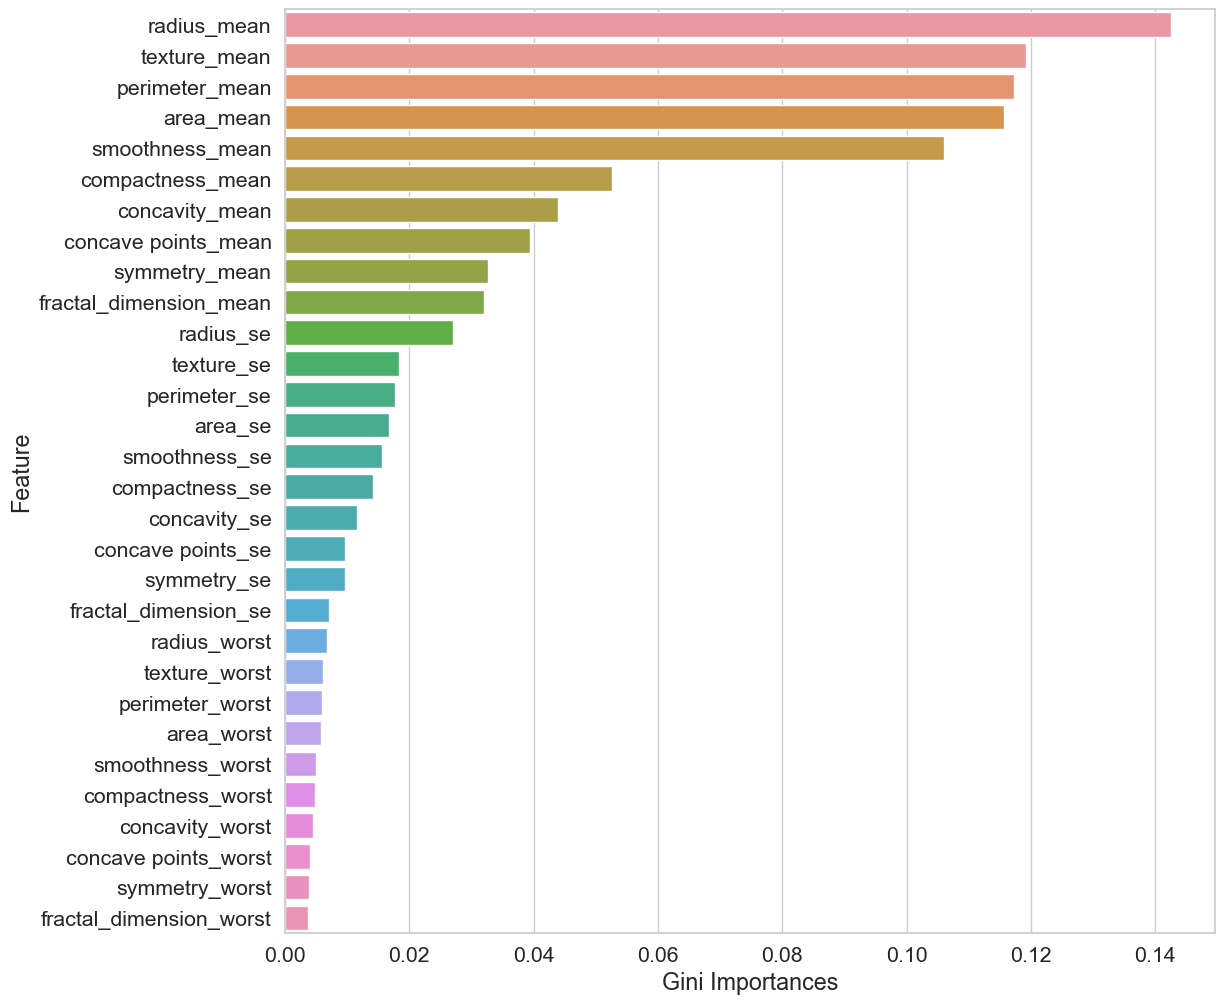

In [30]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
sns.set_style ('whitegrid')
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.show()

feat_imp.index = feat_imp.Feature

In [31]:
#taking the first 15 independent variable from the graph
feat_to_keep = feat_imp.iloc[:15].index
display (feat_to_keep)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
      dtype='object', name='Feature')

In [32]:
best_model = dict()
all_models = {
    'SVC': {'param': {'C': [0.1, 1, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 10, 100]}},
    'RandomForestClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'DecisionTreeClassifier': {'param': {'criterion': ['gini', 'entropy'], 'max_depth': [0, 1, 2, 3, 4, 5]}},
    'XGBClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'LogisticRegression': {'param': {'C': [0.1, 1, 100, 1000], 'max_iter': [10, 50, 100, 500], 'verbose': [0, 1, 2, 3]}},
    'KNeighborsClassifier': {'param': {'n_neighbors': [1, 2, 4, 5, 10, 15, 20, 50], 'metric': ['minkowski'], 'p': [1, 2]}},
    'BernoulliNB': {'param': {}},
    'AdaBoostClassifier': {'param': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}}
}
model_map = {
    'SVC': SVC,
    'RandomForestClassifier': RandomForestClassifier,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'XGBClassifier':XGBClassifier,
    'LogisticRegression':LogisticRegression,
    'KNeighborsClassifier':KNeighborsClassifier,
    'BernoulliNB':BernoulliNB,
    'AdaBoostClassifier':AdaBoostClassifier
}
for model_name, model_params in all_models.items():
    model = model_map[model_name]()
    FitModel(X_res[feat_to_keep], Y_res, model_name, model, model_params['param'], cv=10)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.91      0.91        68
           1       0.92      0.91      0.91        75

    accuracy                           0.91       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143

Accuracy Score 0.9090909090909091
Confusion Matrix :
 [[62  6]
 [ 7 68]]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 

In [33]:
#Displaying best three models

best_five_models = sorted(best_model.items(), key=lambda item: item[1],reverse = True)[:5]
print('Best Five models')
for key, value in best_five_models:
    print(key, value, end='\n')

Best Five models
XGBClassifier 0.986013986013986
LogisticRegression 0.9790209790209791
AdaBoostClassifier 0.9790209790209791
RandomForestClassifier 0.972027972027972
DecisionTreeClassifier 0.965034965034965


# Conclusion:
Best results were obtained using oversampling method(method 2). Thus, loading the pickle file of the best 3 classification models below.

# Loading Pickle file

In [35]:
all_models = {
    'RandomForestClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'XGBClassifier': {'param': {'n_estimators': [100, 500, 1000, 2000]}},
    'AdaBoostClassifier': {'param': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}}
}
model_map = {
    'RandomForestClassifier': RandomForestClassifier,
    'XGBClassifier':XGBClassifier,
    'AdaBoostClassifier':AdaBoostClassifier
}
for model_name, model_params in all_models.items():
    model = model_map[model_name]()
    FitModel(X_res, Y_res, model_name, model, model_params['param'], cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 

In [37]:
def load_model():
    for model_name,_ in all_models.items():
        model=pickle.load(open(model_name,'rb'))
        prediction = model.predict(x)
        print (model.best_params_)
        print (accuracy_score (prediction,y))
        display (prediction)
load_model()

{'n_estimators': 2000}
0.9964850615114236


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

{'n_estimators': 100}
0.9964850615114236


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

{'learning_rate': 0.1, 'n_estimators': 200}
0.9964850615114236


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,